In [1]:
# importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading dataset
data = pd.read_csv("happiness_score_dataset.csv")

In [3]:
data.shape

(158, 12)

In [4]:
# using isnull fuction to chk whether there is any missing value or not
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
# need to chk data dtype 
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
# dropping  Country Region and Happiness Rank as it is not giving any useful information
# I have Happiness Score that is working as a Rank eg. Happiness Score is 7.587 then rank 1 and  Happiness Score is 2.839 then rank 158

data = data.drop(['Country','Region','Happiness Rank'],axis=1)
data.head() # using head function to extract top 5 rows.

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
# chking data type again
data.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

<AxesSubplot:xlabel='Happiness Score'>

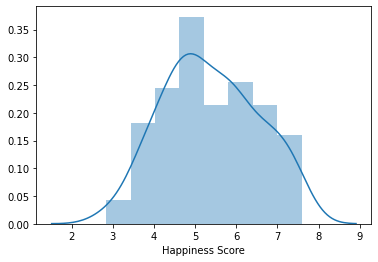

In [8]:
# to chk whether data is normally distributed or not
sns.distplot(data['Happiness Score'])

In [9]:
# Through graph it was bit confusing to uderstand hence i used describe function to chk whether data is normally distributed or not
data['Happiness Score'].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

i can see that data is normally distributed.

<AxesSubplot:xlabel='Happiness Score'>

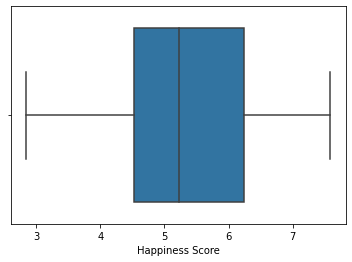

In [10]:
# to check whether there is any outlier or not
sns.boxplot(data['Happiness Score'])

As i can see there is no outlier 

In [11]:
# need to chk how variables are correlated with each other
corr = data.corr()

In [12]:
corr

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

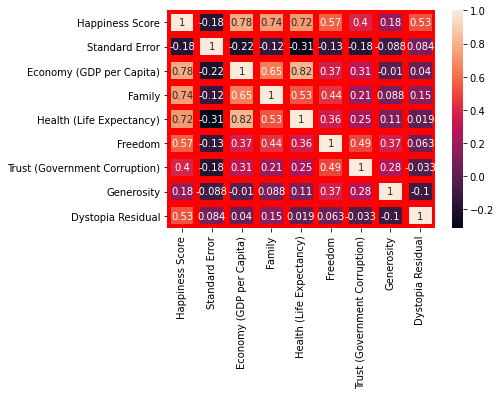

In [13]:
sns.heatmap(corr,annot=True,linewidths=6,linecolor='r')

In [14]:
# Now Segregating independent and dependent variables in form of x and y

x = data.drop('Happiness Score',axis=1)
y = data['Happiness Score']

In [15]:
# splitting data arrays into two subsets: for training data and for testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=12) # in this i have trained 70 % of my data and 30% for testing

In [16]:
# chking no of rows and no. of columns
x_train.shape

(110, 8)

In [17]:
x_test.shape

(48, 8)

In [18]:
# Now we have to do Scalling so that it will normalize the data within a particular range eg. in between 0 to 1
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

In [19]:
# Now i have to chk whether my x_train and x_test data has normallized or not.
x_train

array([[0.41149675, 0.40305368, 0.71911244, 0.55853653, 0.83197989,
        0.16855654, 0.23256267, 0.76209387],
       [0.42863341, 0.65495557, 0.82646371, 0.88935963, 0.59852   ,
        0.24649479, 0.39926183, 0.71703894],
       [0.16518438, 0.73956768, 0.96993194, 0.94094553, 0.94665331,
        0.82213454, 0.58299869, 0.59130427],
       [0.20401302, 0.84432863, 0.82740449, 0.83827094, 0.95050271,
        0.73902467, 0.30913486, 0.58616613],
       [0.20639913, 0.79106376, 0.95329933, 0.92235182, 0.92019968,
        0.35772295, 0.39568794, 0.67346253],
       [0.17592191, 0.72678388, 0.89956489, 0.94664277, 0.54907544,
        0.14911508, 0.3967796 , 0.84310659],
       [0.24403471, 0.73627264, 0.70392039, 1.        , 0.40650707,
        0.15049418, 0.20684367, 0.57771967],
       [0.25574837, 0.71426036, 0.95696688, 0.9190267 , 0.8838501 ,
        0.26022832, 0.63824451, 0.40329794],
       [0.35715835, 0.2752807 , 0.56678034, 0.15729557, 0.64657597,
        0.34328072, 0.227741

In [20]:
x_test

array([[0.21102139, 0.72718003, 0.76088341, 0.83932587, 0.80208512,
        0.01548286, 0.2380531 , 0.23422701],
       [0.12033011, 0.07269572, 0.2739817 , 0.37394265, 0.67711823,
        0.26964922, 0.42208919, 0.6886657 ],
       [0.10267104, 0.80202319, 0.86800742, 0.96344519, 0.77319266,
        0.32444873, 0.18575395, 0.39530725],
       [0.16798296, 0.08639749, 0.75509833, 0.26479217, 0.71260266,
        0.12808384, 0.50435537, 0.29679705],
       [0.18768302, 0.6608321 , 0.82414634, 0.77123798, 0.94067229,
        0.44267157, 0.40326219, 0.63979629],
       [0.12033011, 0.97160376, 0.65232222, 1.        , 0.84545497,
        0.89118332, 0.53973625, 0.47231475],
       [0.09228858, 0.09386628, 0.42828685, 0.36119023, 0.92257944,
        1.        , 0.39264272, 0.00619023],
       [0.18839294, 0.65987318, 0.54797249, 0.36662955, 0.49734295,
        0.19765665, 0.11837585, 0.13227054],
       [0.19664567, 0.69558288, 0.72110644, 0.67783798, 0.46238838,
        0.1110727 , 0.316258

As i can see that my x_train and x_test data has been successfully normallized

In [21]:
# now i have to import required Algorithms to build model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [22]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
lr_pd = lr.predict(x_test)

In [24]:
# Now i have to import Best metrics to evaluate Regression Model to chk how well the regression model fits the observed data

from sklearn.metrics import r2_score
print(r2_score(lr_pd,y_test))

0.9759746865136432


In [25]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [26]:
dtr_pd = dtr.predict(x_test)
print(r2_score(dtr_pd,y_test))

0.6684090011660766


In [27]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
rfr_pd = rfr.predict(x_test)
print(r2_score(rfr_pd,y_test))

0.7961552113107754


In [29]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [30]:
svr_pd = svr.predict(x_test)
print(r2_score(svr_pd,y_test))

0.8861917230631339


In [31]:
# Now i have to chk the cross_val_score() function that is  used to perform the evaluation
from sklearn.model_selection import cross_val_score

In [32]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.9999981871007761


In [33]:
print(cross_val_score(dtr,x,y,cv=5).mean())

-6.970778844437428


In [34]:
print(cross_val_score(rfr,x,y,cv=5).mean())

-3.1423748082839715


In [35]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.028707305604232625


In [36]:
# Now i will use Hypertuning method to tune the model 

from sklearn.model_selection import GridSearchCV


In [37]:
# taking required parameters to tune the model
parameter ={'n_jobs':['None'],
            'fit_intercept':['True', 'False'],
            'normalize':['True','False'],
            'copy_X':['True','False']}

In [38]:
gcv = GridSearchCV(LinearRegression(),parameter,cv=5)

In [39]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'], 'n_jobs': ['None'],
                         'normalize': ['True', 'False']})

In [40]:
# this function will show the best fit parameter which will give maximum accuracy
gcv.best_params_

{'copy_X': 'True',
 'fit_intercept': 'True',
 'n_jobs': 'None',
 'normalize': 'True'}

In [46]:
# using the parameter which i got from 
Final_mod = LinearRegression(fit_intercept='True',copy_X='True',n_jobs='None',normalize='True')

In [47]:
Final_mod.fit(x_train,y_train)

LinearRegression(copy_X='True', fit_intercept='True', n_jobs='None',
                 normalize='True')

In [48]:
Final_mod_predict = Final_mod.predict(x_test)

In [49]:
print(r2_score(lr_predict,y_test))

0.9759746865136436


In [51]:
import joblib
joblib.dump(Final_mod,"final_modle.pkl")

['final_modle.pkl']